#  Keras for Simple Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This notebook demonstrates the use of keras functions for simple regression problem, *Boston Housing*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

Necessary Imports 

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

Importing the file into **pandas** dataframe

In [2]:
Housing = pd.read_csv(r"G:\Ddrive\PG DBDA\12 Practical Machine Learning_\Cases\Real Estate/Housing.csv")
Housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


For the column **Boston** which is a response variable, the hot encoding / dummying needs to be done.

In [62]:
Housing.shape

(546, 12)

In [4]:
House = pd.get_dummies(Housing,drop_first=True)
House.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,True,False,True,False,False,False
1,38500.0,4000,2,1,1,0,True,False,False,False,False,False
2,49500.0,3060,3,1,1,0,True,False,False,False,False,False
3,60500.0,6650,3,1,2,0,True,True,False,False,False,False
4,61000.0,6360,2,1,1,0,True,False,False,False,False,False


In [7]:
X = House.iloc[:,1:]
y = House.iloc[:,0]

In [8]:
X.head()

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,5850,3,1,2,1,True,False,True,False,False,False
1,4000,2,1,1,0,True,False,False,False,False,False
2,3060,3,1,1,0,True,False,False,False,False,False
3,6650,3,1,2,0,True,True,False,False,False,False
4,6360,2,1,1,0,True,False,False,False,False,False


In [9]:
y.head()

0    42000.0
1    38500.0
2    49500.0
3    60500.0
4    61000.0
Name: price, dtype: float64

In [10]:
X = X.values
y = y.values

In [13]:
X[:5]

array([[5850, 3, 1, 2, 1, True, False, True, False, False, False],
       [4000, 2, 1, 1, 0, True, False, False, False, False, False],
       [3060, 3, 1, 1, 0, True, False, False, False, False, False],
       [6650, 3, 1, 2, 0, True, True, False, False, False, False],
       [6360, 2, 1, 1, 0, True, False, False, False, False, False]],
      dtype=object)

In [14]:
y[:5]

array([42000., 38500., 49500., 60500., 61000.])

We now, split the data into train and test

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2024)

Scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [17]:
X_trn_scaled = scaler_X.fit_transform(X_train)
y_trn_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [18]:
X_trn_scaled[:5]

array([[0.24014337, 0.4       , 0.        , 0.66666667, 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.06236559, 0.8       , 0.33333333, 0.        , 0.33333333,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        ],
       [0.29964158, 0.2       , 0.        , 0.        , 0.66666667,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.52401434, 0.6       , 1.        , 1.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.19713262, 0.2       , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [19]:
y_trn_scaled[:5]

array([[0.34545455],
       [0.17515152],
       [0.17575758],
       [0.90909091],
       [0.07272727]])

In [20]:
X_tst_scaled = scaler_X.transform(X_test)
y_tst_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [21]:
(X_trn_scaled.shape,y_trn_scaled.shape)

((382, 11), (382, 1))

In [22]:
(X_train.shape, y_train.shape)

((382, 11), (382,))

Let us now define the neural network through which we plan to build the MLP model

For getting reproducible results, we set random number seed and do necessary imports

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import metrics

**Model Definition:**

In [24]:
tf.random.set_seed(2024)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'), 
    tf.keras.layers.Dense(1, activation='relu')  
])

OR

In [22]:
#model = Sequential()
#model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(6, activation='relu'))
#model.add(Dense(3, activation='relu'))
#model.add(Dense(1,activation='relu')) # Output

In [25]:
pip install tensorflow_addons


   ---------------------------------------- 0.0/729.9 kB ? eta -:--:--
   ------------- -------------------------- 245.8/729.9 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------  727.0/729.9 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 729.9/729.9 kB 5.1 MB/s eta 0:00:00


In [26]:
from tensorflow_addons.metrics import RSquare
model.compile(optimizer='sgd', loss='mse',metrics=[RSquare()])

In [27]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________
None


**Model Fitting:**

In [28]:
history = model.fit( X_trn_scaled,y_trn_scaled,validation_data=(X_tst_scaled,y_tst_scaled),verbose=2,epochs=500)

Epoch 1/500
12/12 - 6s - loss: 0.0962 - r_square: -2.6429e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 6s/epoch - 520ms/step
Epoch 2/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6429e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 152ms/epoch - 13ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6429e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 152ms/epoch - 13ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6429e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 154ms/epoch - 13ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6430e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 158ms/epoch - 13ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6429e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 168ms/epoch - 14ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6429e+00 - val_loss: 0.0903 - val_r_square: -2.5484e+00 - 200ms/epoch - 17ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0962 - r_square: -2.6429

In [29]:
%matplotlib inline

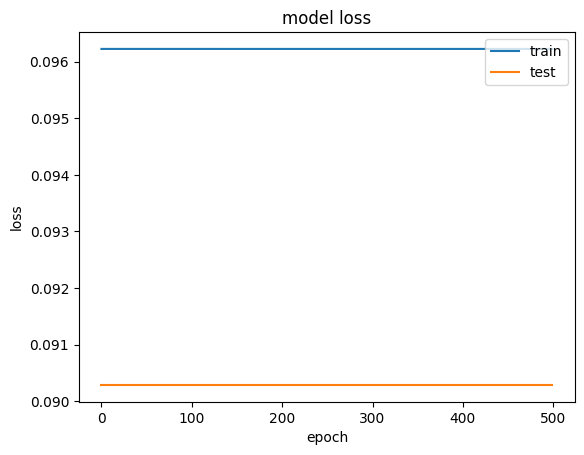

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
y_test

array([20.1, 11.9, 20.6, 33.2, 20.8, 13.5, 24.7, 13.9, 10.4, 19.7, 21.4,
       20.3, 18.5, 12.7, 22. , 36.2,  7.4, 16.3, 23.3, 17.5, 21.5, 19.5,
        8.8, 31.5, 50. , 50. , 23.7, 22.5, 18. , 27.9, 21.7, 28.6, 20. ,
       17.5,  8.3, 12.1, 13.8, 27.1, 14.9, 21.9,  8.3, 15.1, 20.4,  8.5,
       14.1, 37.9, 16.2, 13.9, 12.5, 15. , 22.3, 11.3, 32.2, 28.2, 23.8,
       15.3, 24.3, 25. , 27.5, 19.4, 16.1, 27.5, 13.1, 30.1, 27.1, 18.9,
       32.9, 21.2, 36.2, 18.1, 10.2, 23.1,  7.5, 20.1, 23.3, 14.4,  8.1,
       10.2,  6.3, 29. , 16.2, 22. , 20.5, 22.8, 23.2,  9.7, 26.6, 27.9,
        7.2, 36.5, 22.1, 25. , 23.9, 13.2, 16.7, 22. , 22.8, 19.4, 13.8,
       23. , 33.1, 11.7, 44. , 22.3, 23.1, 17.4, 48.3, 29.1,  7. , 37.3,
       14.1,  9.5,  5. , 20.6, 31.1, 24.1, 25. , 21.5, 20.6, 29. , 39.8,
       23.3, 25.1, 22.9, 26.5, 19.6,  8.7, 23.1, 13.4, 14.9, 19.1, 14. ,
       21.1, 22.6, 25. , 42.3, 25. ,  8.4, 29.9,  9.6, 35.2, 46.7, 33.1,
       18.9,  7.2, 29.8, 17.5,  8.4, 15.2, 18.5, 18

In [25]:
X_test

array([[1.39600e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.92690e+02, 1.23300e+01],
       [2.07162e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.70220e+02, 2.33400e+01],
       [4.83567e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.88220e+02, 1.14500e+01],
       ...,
       [3.04100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.94810e+02, 1.05600e+01],
       [5.66637e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.95690e+02, 1.65900e+01],
       [3.35900e-02, 7.50000e+01, 2.95000e+00, ..., 1.83000e+01,
        3.95620e+02, 1.98000e+00]])

In [32]:
from sklearn.metrics import mean_squared_error
y_pred_scl = model.predict(X_tst_scaled)
y_pred_ = scaler_y.inverse_transform(y_pred_scl)
RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_))
print(f"RMSE: {RMSE}")

6/6 [==============================] - 0s 5ms/step
RMSE: 49579.44695588304


In [32]:
y_pred_

array([[141.46297 ],
       [245.42963 ],
       [239.11604 ],
       [115.074715],
       [248.0495  ],
       [108.62582 ],
       [111.95262 ],
       [111.18263 ],
       [221.23225 ],
       [137.48628 ],
       [242.53534 ],
       [133.80652 ],
       [150.9989  ],
       [219.42912 ],
       [108.24178 ],
       [120.1675  ],
       [242.32858 ],
       [238.55127 ],
       [139.4848  ],
       [131.26102 ],
       [120.18572 ],
       [141.76807 ],
       [239.54576 ],
       [126.302864],
       [241.60599 ],
       [118.61262 ],
       [112.52986 ],
       [115.97233 ],
       [151.80304 ],
       [114.04103 ],
       [112.955086],
       [117.56091 ],
       [119.585396],
       [137.64565 ],
       [243.59723 ],
       [244.60577 ],
       [240.31526 ],
       [122.7723  ],
       [247.41646 ],
       [242.66202 ],
       [215.64339 ],
       [242.48277 ],
       [154.01357 ],
       [245.52475 ],
       [242.91576 ],
       [122.99754 ],
       [121.77676 ],
       [245.7

In [29]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true=y_test,y_pred=y_pred_)
print(f"MAE: {MAE}")

MAE: 22.775639231581437


# Early Stopping

If we continue to train the network, it may overfit. We can have a stop point where the accuracy may start falling.

For getting reproducible results, we set random number seed 

**Model Definition:**

In [36]:
tf.random.set_seed(2021)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'), 
    tf.keras.layers.Dense(1, activation='relu')  
])
from tensorflow_addons.metrics import RSquare
model.compile(optimizer='sgd', loss='mse',metrics=[RSquare()])
#model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mae'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=2, mode='auto',
        restore_best_weights=True)
history2 = model.fit(X_trn_scaled,y_trn_scaled,validation_data=(X_tst_scaled,y_tst_scaled),callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
12/12 - 4s - loss: 0.0663 - r_square: -1.5097e+00 - val_loss: 0.0497 - val_r_square: -9.5144e-01 - 4s/epoch - 344ms/step
Epoch 2/500
12/12 - 0s - loss: 0.0448 - r_square: -6.9433e-01 - val_loss: 0.0357 - val_r_square: -4.0290e-01 - 160ms/epoch - 13ms/step
Epoch 3/500
12/12 - 0s - loss: 0.0338 - r_square: -2.7946e-01 - val_loss: 0.0289 - val_r_square: -1.3462e-01 - 156ms/epoch - 13ms/step
Epoch 4/500
12/12 - 0s - loss: 0.0283 - r_square: -7.0799e-02 - val_loss: 0.0256 - val_r_square: -4.6415e-03 - 154ms/epoch - 13ms/step
Epoch 5/500
12/12 - 0s - loss: 0.0255 - r_square: 0.0343 - val_loss: 0.0240 - val_r_square: 0.0554 - 157ms/epoch - 13ms/step
Epoch 6/500
12/12 - 0s - loss: 0.0241 - r_square: 0.0866 - val_loss: 0.0233 - val_r_square: 0.0841 - 145ms/epoch - 12ms/step
Epoch 7/500
12/12 - 0s - loss: 0.0234 - r_square: 0.1128 - val_loss: 0.0230 - val_r_square: 0.0967 - 164ms/epoch - 14ms/step
Epoch 8/500
12/12 - 0s - loss: 0.0231 - r_square: 0.1267 - val_loss: 0.0228 - val_r_squ

Let us see the parameters in the early stopping involved:
- **monitor**: quantity to be monitored.<br>
- **min_delta**: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.<br>
- **patience**: number of epochs with no improvement after which training will be stopped.<br>
- **mode**: one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- **baseline**: Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline.<br>
- **restore_best_weights**: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

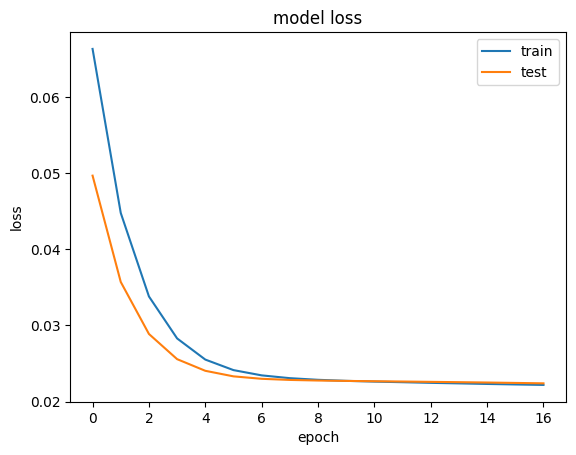

In [38]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
y_pred_scl = model.predict(X_tst_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scl)
print(y_test[:10])
print(y_pred[:10])

6/6 [==============================] - 0s 6ms/step
[ 25000.  66000.  62500.  64500. 132000.  55500.  44555.  41000.  38000.
  82000.]
[[62558.48 ]
 [68103.8  ]
 [63660.566]
 [63367.07 ]
 [64790.28 ]
 [72486.33 ]
 [61740.277]
 [59114.15 ]
 [63985.555]
 [72621.11 ]]


In [41]:
y_pred_scl[:5]

array([[0.37345847],
       [0.37345847],
       [0.37585416],
       [0.37345847],
       [0.4248363 ]], dtype=float32)

In [40]:
RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(f"RMSE: {RMSE}")

RMSE: 25014.97599562659


In [41]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print(f"MAE: {MAE}")

MAE: 18825.921612995426


In [42]:
from sklearn.metrics import r2_score
MAE = r2_score(y_true=y_test,y_pred=y_pred)
print(f"r2_score: {MAE}")

r2_score: 0.09670756649217749
